# The Underlying Numbers: Using machine learning to predict Premier League Standings.

## Abstract:
Have you ever watched a game where you were really satisfied with your team's performance, the interplay between players, awareness, energy, and overall approach to the game, even though you don't win the game? "Our team was just unlucky, we hit the bar 5 times!" What about a really poor performance where you team still managed to scrap for the win? 

When human beings watch a game, we are processing the underlying numbers. We might not have the statistics to back it up, but we usually have a feeling that player X played really well. His crosses were really good there just wasn't anyone to head them in...
How good can symbolic regression predict teams to be by looking at the underlying numbers?

# Project and Dataset description
### Dataset
All the datasets were obtained from www.footystats.org.
The data is the statstics that each Premier League team has generated in a Leage football in a season, from the 2010/2011 season to the 2021/2022. It is divided into 2 categories:
- Pre-XG category: Before the 2016/17 season, the data lacks the expected goals (XG) metrics as the algorithm for measuring the expected goals from an attacking opportunity had not yet been standardized across football. So we have 0 for every XG derived metric. So I combined all the data from the 10/11 season to the 14/15 season into one dataset.
- XG category: From 2016/17 season, and includes all the expected goals metrics (XG for, XG against, and their corresponding averages). So here, I combined data from the 16/17 to the 19/20 season.

The daset has 293 features, of which 261 will be fitted by our models, from goals and expected goals, to goals conceded in the specific 10 minute slices of the game.

### Why this difference is important
- XG (Expected Goals) is an important statistic in soccer (football) analytics that quantifies the quality of scoring opportunities based on various factors such as distance from goal, angle, type of shot, and defensive pressure. It provides a numerical measure of the likelihood that a shot will result in a goal.

Due to the this difference in dataset, I have decided to find the best regression models for the pre-xg data subsets and the for the xg data subsets separately, and then combine their findings to predict the most recent/completed season (2021/22).
Since the 2022/23 season only has a couple of games left, and we already have a good idea of how it will end, we will try verifying our model on it as well.


In [1]:
from gplearn.genetic import SymbolicRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
xg_df = pd.read_csv('xg_dataset.csv')

This dataset contains the league rankings of the premier league from the 2016/17 season up to and including the 2019/20 season.
It will be used to train the base/sub model that accounts for expected goals.

In [3]:
xg_df

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
0,Arsenal FC,Arsenal,2016/2017,England,38,19,19,0,23,14,...,7,3,5,16,16,16,24,11,37,8
1,Tottenham Hotspur FC,Tottenham Hotspur,2016/2017,England,38,19,19,0,26,17,...,4,1,4,21,11,32,11,0,21,8
2,Manchester City FC,Manchester City,2016/2017,England,38,19,19,0,23,11,...,4,5,6,24,37,11,16,5,26,11
3,Leicester City FC,Leicester City,2016/2017,England,38,19,19,0,12,10,...,5,7,10,21,21,21,47,26,68,11
4,Stoke City FC,Stoke City,2016/2017,England,38,19,19,0,11,7,...,8,7,8,29,32,26,42,32,53,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Aston Villa FC,Aston Villa,2019/2020,England,38,19,19,0,9,7,...,9,8,16,21,16,26,55,47,63,28
76,Norwich City FC,Norwich City,2019/2020,England,38,19,19,0,5,4,...,5,8,11,16,16,16,71,63,79,18
77,Brighton & Hove Albion FC,Brighton & Hove Albion,2019/2020,England,38,19,19,0,9,5,...,6,8,5,37,37,37,39,37,42,13
78,Wolverhampton Wanderers FC,Wolverhampton Wanderers,2019/2020,England,38,19,19,0,15,8,...,0,1,7,37,37,37,24,21,26,5


I will now clean up the dataset, removing all the columns containing non-pertinent information, such as club-name, and all the columns that could turn this into a trivial arithmetic/statistics endeavour, such as points-per-game, or number of wins, draws, and losses..

In [4]:
xg_X = xg_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)

In [5]:
xg_league_position_target = xg_df['league_position']
xg_points_per_game_target = xg_df['points_per_game']

In [6]:
xg_X

,matches_played,matches_played_home,matches_played_away,suspended_matches,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,...,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,over145_corners_percentage
0,38,19,19,0,77,44,33,121,55,66,...,3,7,2,2,6,9,7,3,5,8
1,38,19,19,0,86,26,60,112,56,56,...,2,3,3,0,5,4,4,1,4,8
2,38,19,19,0,80,39,41,119,54,65,...,6,3,1,5,4,5,4,5,6,11
3,38,19,19,0,48,63,-15,111,56,55,...,5,5,5,10,9,7,5,7,10,11
4,38,19,19,0,41,56,-15,97,48,49,...,4,4,3,7,7,8,8,7,8,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,38,19,19,0,41,67,-26,108,52,56,...,2,3,7,5,12,5,9,8,16,28
76,38,19,19,0,26,75,-49,101,56,45,...,5,7,11,5,11,12,5,8,11,18
77,38,19,19,0,39,54,-15,93,47,46,...,4,6,7,2,10,6,6,8,5,13
78,38,19,19,0,51,40,11,91,46,45,...,5,5,4,6,9,3,0,1,7,5


In [7]:
xg_test_df = pd.read_csv('teams_dataset2021.csv')
xg_text_X = xg_test_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)

# Techniques and models

Two ways to predict leaugue standings:
- Directly predicting the league_position variable.
- Predicting the points per game variable, and sorting the teams according to that predicted variable.

To find what the best base models are, we will test them on the data for the 20/21 season.

# First subset (training: 2016/17 to 2019/20;  testing: 2020/21)

In [8]:
first_xg_regressor = SymbolicRegressor(population_size=5000,
                                       generations=200,
                                       tournament_size=20,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.9,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=49)
first_xg_regressor.fit(xg_X, xg_league_position_target)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.28      6.68042e+17        3          2.51708          3.82375      6.40m
   1     5.91          3870.89        1          2.34722            3.375      5.36m
   2     4.14      1.97213e+10        7          2.01311          1.89935      4.99m
   3     2.87          8183.27        7          1.92177          2.72141      4.80m
   4     2.07      5.32621e+12        7          1.81979          3.63926      4.90m
   5     4.07          218.399       11          1.71895          3.08812      4.96m
   6     6.71          49.7526        7          1.73788          4.37648      5.42m
   7     7.20          2362.42       11          1.64527          3.55912      5.80m
   8     7.60          16637.1       11          1.66106            3.417  

  94    18.28          8169.33       19          1.45715          3.19839      3.70m
  95    18.49      1.18827e+06       25          1.36253          3.50726      3.68m
  96    18.21      6.77976e+06       19          1.42895           3.4522      3.89m
  97    18.10          386.705       19          1.42069          3.52655      3.61m
  98    18.23          1347.92       19          1.44247          3.33052      3.63m
  99    18.29           277.53       19          1.43929          3.35919      3.79m
 100    18.21          1796.66       19          1.43097          3.43402      3.53m
 101    18.23          28076.2       19          1.40238          3.69138      3.46m
 102    18.57       6.4349e+08       19          1.42454          3.49195      3.45m
 103    18.68            96105       25          1.43413           2.8629      3.68m
 104    18.64      4.08163e+09       19           1.4116          3.60839      3.39m
 105    18.80           183049       25          1.44572         

 191    20.26      3.63807e+06       25          1.40783          2.93398     19.04s
 192    20.42          2121.77       19          1.37265          3.56528     17.94s
 193    20.27      5.12624e+06       25          1.39082          3.08704     14.12s
 194    20.05       3.2894e+06       25          1.38322          2.84717     11.74s
 195    20.58           247.81       25          1.34885          3.15645      9.51s
 196    20.80          468.267       25          1.35721          3.08121      7.13s
 197    20.89      4.76332e+07       25           1.3687          2.97782      5.16s
 198    20.82          5946.85       25          1.35264          3.12233      2.44s
 199    20.65       6.3628e+06       25          1.36065          3.05032      0.00s


SymbolicRegressor(generations=200, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=49, stopping_criteria=0.01,
                  verbose=1)

(Shoutout to my GPU)

In [9]:
xg_pred = first_xg_regressor.predict(xg_text_X)
print ('Predicted: ', xg_pred)
print ('Actual values:\n', xg_test_df["league_position"])
print('MSE = ', mean_squared_error(xg_test_df["league_position"], xg_pred))
print(first_xg_regressor._program)

Predicted:  [ 9.46956806  4.07619048 -0.70786152  4.1000297  14.79881459 14.06182432
  9.72423111 19.52320512 11.23891892  7.56884481  4.97078507  5.6951575
  3.89505726 15.39091853  8.60017121 11.87224244 11.00652264 13.72632776
 15.50470638 19.13822722]
Actual values:
 0      8
1      7
2      1
3      5
4     19
5     14
6     10
7     17
8     15
9      2
10     3
11     4
12     6
13    13
14    11
15    18
16    16
17     9
18    12
19    20
Name: league_position, dtype: int64
MSE =  10.210060764944126
add(X240, sub(add(X240, sub(add(X240, sub(div(add(X219, X186), div(X161, X28)), div(X175, X231))), div(X204, X216))), div(X175, X231)))


An MSE of 10 on when predicting 20 positions is not promising.

For now, let us make a linear model to predict points per game. We will revisit positions later

In [10]:
second_xg_regressor = SymbolicRegressor(population_size=5000,
                                       generations=200,
                                       tournament_size=20,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.9,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=26)
second_xg_regressor.fit(xg_X, xg_points_per_game_target)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.31      7.26438e+15        3         0.216211         0.313432      6.81m
   1     6.33           544781        1         0.124028          0.24625      5.66m
   2     3.67          25339.5        1           0.1275            0.215      6.18m
   3     2.59      9.50176e+14        1         0.124444           0.2425      5.12m
   4     1.82      3.02784e+12        1         0.119722            0.285      5.12m
   5     1.38      8.09507e+07        1         0.118333           0.2975      4.82m
   6     1.31          813.312        1         0.119028          0.29125      4.87m
   7     1.36           465491        1         0.120556           0.2775      4.82m
   8     1.39      2.84105e+06        1         0.120417          0.27875  

  94     1.40          1536.25        1         0.116667           0.3125      2.74m
  95     1.40           917732        1         0.119444           0.2875      2.72m
  96     1.34          366.225        1             0.12           0.2825      2.73m
  97     1.40      3.62612e+12        1         0.119583          0.28625      2.70m
  98     1.41      1.63265e+06        1         0.117917          0.30125      2.65m
  99     1.44           182871        1         0.117639          0.30375      2.61m
 100     1.33          215.016        1         0.119306          0.28875      3.10m
 101     1.32          580.918        1         0.119722            0.285      2.59m
 102     1.34          3676.34        1         0.119167             0.29      2.53m
 103     1.41      3.06439e+07        1         0.118333           0.2975      2.56m
 104     1.32          3540.37        1         0.118889           0.2925      2.46m
 105     1.36           130397        1         0.117917         

 191     1.38      1.85423e+06        1         0.119028          0.29125     13.24s
 192     1.41          805.589        1         0.119583          0.28625     11.73s
 193     1.45          5749.22        1             0.12           0.2825     10.09s
 194     1.37          29665.7        1         0.118194          0.29875      8.41s
 195     1.31            99278        1         0.119167             0.29      6.68s
 196     1.35      5.72879e+08        1         0.118889           0.2925      5.01s
 197     1.36      6.10364e+07        1          0.11875          0.29375      4.15s
 198     1.36          679.793        1         0.116111           0.3175      1.68s
 199     1.32      6.94704e+08        1         0.116944             0.31      0.00s


SymbolicRegressor(generations=200, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=5000, random_state=26, stopping_criteria=0.01,
                  verbose=1)

In [11]:
second_xg_pred = second_xg_regressor.predict(xg_text_X)
print ('Predicted: ', second_xg_pred)
print ('Actual values:\n', xg_test_df["points_per_game"])
print('MSE = ', mean_squared_error(xg_test_df["points_per_game"], second_xg_pred))
print(second_xg_regressor._program)

Predicted:  [1.45 1.79 2.18 1.79 0.92 1.08 1.24 0.87 1.24 1.92 1.79 1.53 1.63 1.21
 1.45 0.71 1.05 1.63 0.95 0.53]
Actual values:
 0     1.61
1     1.63
2     2.26
3     1.74
4     0.68
5     1.16
6     1.55
7     1.03
8     1.13
9     1.95
10    1.82
11    1.76
12    1.71
13    1.18
14    1.45
15    0.74
16    1.08
17    1.55
18    1.18
19    0.61
Name: points_per_game, dtype: float64
MSE =  0.019370000000000005
X76


# Initial results:
1. Our linear regression model is a good predictor of points per game
The teams are indexed by number (from 0 to 19) and the position of that number in the list is their position in the standings.

In [12]:
arr = np.array([1.45, 1.79, 2.18, 1.79, 0.92, 1.08, 1.24, 0.87,
                1.24, 1.92, 1.79, 1.53, 1.63, 1.21, 1.45, 0.71,
                1.05, 1.63, 0.95, 0.53])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by PPG:", sorted_indices[::-1])

arr2 = np.array(xg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:          ", sorted_indices2[::-1])

Standings predicted by PPG: [ 2  9  1  3 10 17 12 11  0 14  8  6 13  5 16 18  4  7 15 19]
Actual Standings:           [ 2  9 10 11  3 12  1  0  6 17 14 13 18  5  8 16  7 15  4 19]


Observe: 7 teams's predicted positions match up their actual positions in the 2020/21 season (4 if you consider that that some teams were predicted to have equal values of points per game- 1,3,10, and 12, 17) 

- 10 teams are predicted to be positioned at least +- 2positions from their actual position.
- All teams (except team 14) were correctly predicted to end up in their actual half of the table. Team 14 was predicted to be 10th but was actually 11th.
- Predicted correctly 5 out 6 teams in the top 6 (remember 12 and 17 are interchangeable in the predicted standings).   
    
Preliminary conclusion: the underlying numbers are be a good predictor, with a linear regressor model, for the league standing, particularly, the order of points per game.

2. Our linear regression model is, however, not as good a predictor for the final_league_position variable, as observed below:

In [13]:
arr = np.array([ 9.46956806, 4.07619048, -0.70786152,  4.1000297,  14.79881459, 14.06182432,
  9.72423111, 19.52320512, 11.23891892,  7.56884481,  4.97078507,  5.6951575,
  3.89505726, 15.39091853,  8.60017121, 11.87224244, 11.00652264, 13.72632776,
 15.50470638, 19.13822722,])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by Linear regression:", sorted_indices[::-1])

arr2 = np.array(xg_test_df["league_position"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:          ", sorted_indices2[::-1])

Standings predicted by Linear regression: [ 7 19 18 13  4  5 17 15  8 16  6  0 14  9 11 10  3  1 12  2]
Actual Standings:           [19  4 15  7 16  8  5 13 18 14  6 17  0  1 12  3 11 10  9  2]


All but one team were correctly predicted to be in their half of the league table, but otherwise not very accurate. 

As the linear models are a good predictor of PPG, and using PPG rank translates perfectly to league rank, preliminary finsigs suggest that the above linear regression model is good for the job. However, we will consider other forms of regression too, especially for straight up league rank prediction.

Now, the Random Forest Regressor Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10000,
                            max_depth=1000,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='auto',
                            random_state=42)
rf_model.fit(xg_X, xg_league_position_target)
rf_predictions = rf_model.predict(xg_text_X)
print (rf_predictions)
print (xg_test_df["league_position"])
rf_mse = mean_squared_error(xg_test_df["league_position"], rf_predictions)
print("Random Forest Regression MSE:", rf_mse)

[ 7.2555  5.2086  1.9535  6.4721 17.7263 16.6596  9.6737 15.0127 13.3757
  5.0257  4.5309  5.53    6.5484 13.9818  8.221  17.981  10.0087  7.1903
 14.4525 18.7954]
0      8
1      7
2      1
3      5
4     19
5     14
6     10
7     17
8     15
9      2
10     3
11     4
12     6
13    13
14    11
15    18
16    16
17     9
18    12
19    20
Name: league_position, dtype: int64
Random Forest Regression MSE: 4.584670024000001


In [15]:
arr = np.array([ 7.2555,  5.2086,  1.9535,  6.4721, 17.7263, 16.6596,  9.6737, 15.0127, 13.3757,
  5.0257,  4.5309,  5.53,  6.5484, 13.9818,  8.221,  17.981,  10.0087,  7.1903, 14.4525, 18.7954])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by MLP:", sorted_indices)

arr2 = np.array(xg_test_df["league_position"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:          ", sorted_indices2)

Standings predicted by MLP: [ 2 10  9  1 11  3 12 17  0 14  6 16  8 13 18  7  5  4 15 19]
Actual Standings:           [ 2  9 10 11  3 12  1  0 17  6 14 18 13  5  8 16  7 15  4 19]


This is a much better mean squared error, compared to mse of 10 of the linear model, when predicting the league position.
The MSE seems to converge to 4.5846.

-  This model predicts only the first and last teams correctly in their positions
-  However, it predicts 16 more teams within 2 positions of their actual position (13 within one position)
- No team is misqualified, except the 10th and 11th swapped.
- So it might not be perfect at pinpointing the exact position, but it has a great 'sense' of how good many teams are.

=> A good generalist, overall. Most "human-like" model.


Now, we try the MLP Regressor

Having tried various combinations of parameters, I settle for the ones below:

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

mlp = MLPRegressor(hidden_layer_sizes=(200, 200), activation='relu', solver='adam', max_iter=1000, random_state=2)

mlp.fit(xg_X, xg_league_position_target)

# Make predictions on the test data
predictions = mlp.predict(xg_text_X)

print(predictions)

print (xg_test_df["league_position"])
# Evaluate the model
score = mlp.score(xg_text_X,xg_test_df["league_position"])
print("MLP Regressor score: {:.2f}".format(score))

[ 5.74885582  5.1901762   1.74235516  7.76515437 21.18933298 15.43703951
  9.74843074 13.14668393 12.87824235  3.91685215  3.09387889  4.76934356
  8.40645291 13.6727765   9.02298454 17.43154023 11.63168373  7.94893189
 14.83743043 23.93837098]
0      8
1      7
2      1
3      5
4     19
5     14
6     10
7     17
8     15
9      2
10     3
11     4
12     6
13    13
14    11
15    18
16    16
17     9
18    12
19    20
Name: league_position, dtype: int64
MLP Regressor score: 0.85


In [17]:
arr = np.array([5.74885582,  5.1901762,   1.74235516,  7.76515437, 21.18933298, 15.43703951,
  9.74843074, 13.14668393, 12.87824235,  3.91685215,  3.09387889,  4.76934356,
  8.40645291, 13.6727765,   9.02298454, 17.43154023, 11.63168373,  7.94893189,
 14.83743043, 23.93837098])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by MLP:", sorted_indices)

arr2 = np.array(xg_test_df["league_position"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:          ", sorted_indices2)

Standings predicted by MLP: [ 2 10  9 11  1  0  3 17 12 14  6 16  8  7 13 18  5 15  4 19]
Actual Standings:           [ 2  9 10 11  3 12  1  0 17  6 14 18 13  5  8 16  7 15  4 19]


This MLP model wiith a .85 score is the best predictor for league position so far.
Observe:

- It predicts 5 out of 20 teams to their actual positions.
- It predicts another 11 teams within +-1 = or 2 positions within their actual positions.
- It predicts 3 out of 4 of the "top four" in the 2020/21 season.
- It predicts correctly all the teams in their respective halves of the standing (except the 10th predicted to be 11th and the 11th predicted to be 10th)

This level of accuracy suggests that there might be upside to training an MLP regressor to predict points per game as well.

In [18]:
mlp2 = MLPRegressor(hidden_layer_sizes=(470, 470), activation='tanh', solver='adam', max_iter=1000, random_state=42)

mlp2.fit(xg_X, xg_points_per_game_target)

# Make predictions on the test data
predictions2 = mlp2.predict(xg_text_X)

print(predictions2)

print (xg_test_df["points_per_game"])
# Evaluate the model
score2 = mlp2.score(xg_text_X,xg_test_df["points_per_game"])
print("MLP Regressor score: {:.2f}".format(score2))

[1.61350404 1.7765505  2.34878507 1.5780341  0.84397887 0.92550842
 1.37244562 1.00010471 1.17785803 1.71620574 1.75923008 1.7654561
 1.69771842 1.16175245 1.6572552  0.80146467 1.33881794 1.51750141
 1.17664955 0.58393998]
0     1.61
1     1.63
2     2.26
3     1.74
4     0.68
5     1.16
6     1.55
7     1.03
8     1.13
9     1.95
10    1.82
11    1.76
12    1.71
13    1.18
14    1.45
15    0.74
16    1.08
17    1.55
18    1.18
19    0.61
Name: points_per_game, dtype: float64
MLP Regressor score: 0.91


In [19]:
arr = np.array([1.61350404, 1.7765505,  2.34878507, 1.5780341,  0.84397887, 0.92550842,
 1.37244562, 1.00010471, 1.17785803, 1.71620574, 1.75923008, 1.7654561,
 1.69771842, 1.16175245, 1.6572552,  0.80146467, 1.33881794, 1.51750141,
 1.17664955, 0.58393998])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by MLP2:", sorted_indices[::-1])

arr2 = np.array(xg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:           ", sorted_indices2[::-1])

Standings predicted by MLP2: [ 2  1 11 10  9 12 14  0  3 17  6 16  8 18 13  7  5  4 15 19]
Actual Standings:            [ 2  9 10 11  3 12  1  0  6 17 14 13 18  5  8 16  7 15  4 19]


A Multi-layered perceptron Regressor using the hyporbolic tangent as an activation function yields a high MLP Score and an okay predictor of ranking.
- we have 5 teams whose ranking was correctly predicted
- and 6 teams within +-2 positions of their predicted positions
- however two teams are in the wrong halves of the table, and far(2+ positions) from where they should be.

In [20]:
mlp3 = MLPRegressor(hidden_layer_sizes=(512, 512), activation='logistic', solver='adam', max_iter=1000, random_state=42)

mlp3.fit(xg_X, xg_points_per_game_target)

# Make predictions on the test data
predictions3 = mlp3.predict(xg_text_X)

print(predictions3)

print (xg_test_df["points_per_game"])
# Evaluate the model
score3 = mlp3.score(xg_text_X,xg_test_df["points_per_game"])
print("MLP Regressor score: {:.2f}".format(score3))

[1.59504006 1.6876538  2.41740785 1.65498814 0.70977318 0.98943357
 1.36683617 0.99022637 1.09984817 1.79915345 1.82310097 1.70732182
 1.57510782 1.05656564 1.72409771 0.77052542 1.32354503 1.55355814
 1.03388847 0.4917335 ]
0     1.61
1     1.63
2     2.26
3     1.74
4     0.68
5     1.16
6     1.55
7     1.03
8     1.13
9     1.95
10    1.82
11    1.76
12    1.71
13    1.18
14    1.45
15    0.74
16    1.08
17    1.55
18    1.18
19    0.61
Name: points_per_game, dtype: float64
MLP Regressor score: 0.91


In [21]:
arr = np.array([1.59504006, 1.6876538,  2.41740785, 1.65498814, 0.70977318, 0.98943357,
 1.36683617, 0.99022637, 1.09984817, 1.79915345, 1.82310097, 1.70732182,
 1.57510782, 1.05656564, 1.72409771, 0.77052542, 1.32354503, 1.55355814,
 1.03388847, 0.4917335 ])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by MLP3:", sorted_indices[::-1])

arr2 = np.array(xg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:           ", sorted_indices2[::-1])

Standings predicted by MLP3: [ 2 10  9 14 11  1  3  0 12 17  6 16  8 13 18  7  5 15  4 19]
Actual Standings:            [ 2  9 10 11  3 12  1  0  6 17 14 13 18  5  8 16  7 15  4 19]


A better predictor of the standings by targeting the points per game: logistic regression.
- 5 teams in their right positions
- 8 temas within +/- 2positions of their actual positions.
- 1 team in the wrong half of the table and far (2+ positions) from  where it should be

It seems we are not having any particular luck using MLP to predict the ponts per game ranking.

Lastly, we try logistic regression on predicting the league standing target variable.

In [22]:
pos_mlp = MLPRegressor(hidden_layer_sizes=(140, 140), activation='logistic', solver='adam', max_iter=2000, random_state=43)

pos_mlp.fit(xg_X, xg_league_position_target)

# Make predictions on the test data
pos_predictions = pos_mlp.predict(xg_text_X)

print(pos_predictions)

print (xg_test_df["league_position"])
# Evaluate the model
pos_score = pos_mlp.score(xg_text_X,xg_test_df["league_position"])
print("MLP Regressor score: {:.2f}".format(pos_score))

[ 4.84287341  4.79006146  1.55573346  7.23977446 18.80012771 16.61361868
 10.58512344 17.99894976 14.83346994  6.32420551  5.39144301  5.78547198
  6.16058013 14.682189    7.16400874 18.28629507 10.00150936  8.06245115
 14.5743704  18.93651556]
0      8
1      7
2      1
3      5
4     19
5     14
6     10
7     17
8     15
9      2
10     3
11     4
12     6
13    13
14    11
15    18
16    16
17     9
18    12
19    20
Name: league_position, dtype: int64
MLP Regressor score: 0.82


In [23]:
arr = np.array([ 4.84287341,  4.79006146,  1.55573346,  7.23977446, 18.80012771, 16.61361868,
 10.58512344, 17.99894976, 14.83346994,  6.32420551,  5.39144301,  5.78547198,
  6.16058013, 14.682189,  7.16400874, 18.28629507, 10.00150936,  8.06245115,
 14.5743704,  18.93651556])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by pos_MLP:", sorted_indices)

arr2 = np.array(xg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:              ", sorted_indices2[::-1])

Standings predicted by pos_MLP: [ 2  1  0 10 11 12  9 14  3 17 16  6 18 13  8  5  7 15  4 19]
Actual Standings:               [ 2  9 10 11  3 12  1  0  6 17 14 13 18  5  8 16  7 15  4 19]


The Logistic regression model proves itself okay, but not better than the linear regression model:
- 9 teams league positions correctly predicted
- 3 more teams within +-2 positions
- 2 teams misqualified in the wrong halves of the table

# Conclusions from first results.
- The symbolic regression model- "second_xg_regressor"- could be the best approach for forecasting final league position by predicting points per game as the target,
- the Randfom Forest regressor- "rf_model"- gives a great "estimate" for most (18) teams when outright targeting the league_position variable. It is most human-like.
- the MLP regressor- "mlp"- with a RELU activation function is also good for predicting the league_position variable.

Now, I use these 3 'best' models on the data from the years 2010/11 to 2015/16, to find the best on this data-subset.

# Second Subset (training: 2010/11 to 2014/15; testing: 2015/16)

In [24]:
prexg_df = pd.read_csv("prexg_dataset.csv")

In [25]:
prexg_X = prexg_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)

In [26]:
prexg_league_position_target = prexg_df['league_position']
prexg_points_per_game_target = prexg_df['points_per_game']

In [27]:
prexg_X

,matches_played,matches_played_home,matches_played_away,suspended_matches,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,...,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,over145_corners_percentage
0,38,19,19,0,72,43,29,115,48,67,...,2,3,5,4,7,6,2,4,10,0
1,38,19,19,0,55,46,9,101,49,52,...,4,6,6,2,8,3,2,7,8,0
2,38,19,19,0,60,33,27,93,46,47,...,1,5,4,3,2,1,4,6,7,0
3,38,19,19,0,46,48,-2,94,49,45,...,5,4,7,9,5,2,3,5,8,0
4,38,19,19,0,56,71,-15,127,60,67,...,6,9,9,5,13,7,9,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38,19,19,0,46,49,-3,95,49,46,...,3,5,3,4,8,7,7,6,6,8
96,38,19,19,0,31,53,-22,84,43,41,...,3,8,5,5,6,6,7,6,7,11
97,38,19,19,0,40,63,-23,103,53,50,...,6,10,5,4,8,11,5,2,12,16
98,38,19,19,0,31,57,-26,88,43,45,...,6,7,3,5,4,5,5,9,13,5


In [28]:
prexg_test_df = pd.read_csv("teams_dataset1516.csv")

In [29]:
prexg_test_X = prexg_test_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)

The first model: Symbolic regression

In [30]:
prexg_symbolic_regressor = SymbolicRegressor(population_size=7000,
                                       generations=200,
                                       tournament_size=28,
                                       stopping_criteria=0.01,
                                       p_crossover=0.7,
                                       p_subtree_mutation=0.1,
                                       p_hoist_mutation=0.05,
                                       p_point_mutation=0.1,
                                       max_samples=0.5,
                                       verbose=1,
                                       parsimony_coefficient=0.01,
                                       random_state=23)
prexg_symbolic_regressor.fit(prexg_X, prexg_points_per_game_target)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.13      3.93589e+15        3         0.179063         0.216716      8.91m
   1     5.29          43865.7        1           0.1362           0.1668      7.31m
   2     3.43            10613        1           0.1342           0.1688      8.49m
   3     2.97          4282.27        1            0.117            0.186      6.98m
   4     1.50      4.89734e+07        1           0.1124           0.1906      6.47m
   5     1.41           265450        1             0.11            0.193      6.39m
   6     1.37            29234        1           0.1102           0.1928      6.43m
   7     1.36          134.519        1           0.1094           0.1936      6.34m
   8     1.38          84590.4        1           0.1116           0.1914  

  94     1.39      7.00973e+06        1           0.1094           0.1936      3.90m
  95     1.36           967829        1           0.1114           0.1916      3.86m
  96     1.40          16507.7        1           0.1116           0.1914      4.75m
  97     1.33          13781.9        1           0.1088           0.1942      3.81m
  98     1.34          65159.4        1           0.1092           0.1938      3.77m
  99     1.34          4084.36        1           0.1054           0.1976      3.77m
 100     1.46           376940        1            0.111            0.192      3.76m
 101     1.39          3871.64        1           0.1074           0.1956      3.72m
 102     1.36          5332.31        1           0.1126           0.1904      3.66m
 103     1.36          18186.4        1            0.107            0.196      3.63m
 104     1.39          3926.21        1           0.1012           0.2018      3.55m
 105     1.39      1.69626e+06        1           0.1118         

 191     1.52           218692        1           0.1064           0.1966     20.75s
 192     1.43      1.53015e+09        1           0.1106           0.1924     17.82s
 193     1.37          2068.06        1           0.1094           0.1936     15.23s
 194     1.40      4.60386e+08        1           0.1044           0.1986     13.05s
 195     1.42          11584.3        1           0.1002           0.2028     11.48s
 196     1.38      9.04648e+06        1            0.115            0.188      8.54s
 197     1.43           344823        1           0.1074           0.1956      5.09s
 198     1.43          6301.77        1           0.1138           0.1892      3.18s
 199     1.37           464.02        1           0.1038           0.1992      0.00s


SymbolicRegressor(generations=200, max_samples=0.5, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=7000, random_state=23, stopping_criteria=0.01,
                  tournament_size=28, verbose=1)

In [31]:
prexg_symbolic_pred = prexg_symbolic_regressor.predict(prexg_test_X)
print ('Predicted: ', prexg_symbolic_pred)
print ('Actual values:\n', prexg_test_df["points_per_game"])
print('MSE = ', mean_squared_error(prexg_test_df["points_per_game"], prexg_symbolic_pred))
print(prexg_symbolic_regressor._program)

Predicted:  [1.71 1.82 1.87 1.79 1.08 0.89 1.03 1.55 1.55 1.18 1.29 1.66 1.55 1.71
 1.11 1.05 1.26 1.16 0.71 1.03]
Actual values:
 0     1.87
1     1.84
2     1.74
3     2.13
4     1.34
5     1.13
6     1.11
7     1.24
8     1.66
9     1.11
10    1.74
11    1.58
12    1.32
13    1.63
14    1.24
15    1.18
16    1.03
17    0.97
18    0.45
19    0.89
Name: points_per_game, dtype: float64
MSE =  0.044069999999999984
X76


In [32]:
arr = np.array([1.71, 1.82, 1.87, 1.79, 1.08, 0.89, 1.03, 1.55, 1.55, 1.18, 1.29, 1.66, 1.55, 1.71,
 1.11, 1.05, 1.26, 1.16, 0.71, 1.03])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted by:", sorted_indices[::-1])

arr2 = np.array(prexg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:              ", sorted_indices2[::-1])

Standings predicted by: [ 2  1  3  0 13 11  8 12  7 10 16  9 17 14  4 15  6 19  5 18]
Actual Standings:               [ 3  0  1  2 10  8 13 11  4 12 14  7 15  5  9  6 16 17 19 18]


Weaker accuracy of the ranking compared to the data with expected goals metrics.
- Only 2 teams predicted acurately (observe that 12 and 7 were predicted to have equal values of xg=1.55)
- 5 more teams within 2 positions

Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

prexg_rf_model = RandomForestRegressor(n_estimators=10000,
                            max_depth=1000,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='auto',
                            random_state=42)
prexg_rf_model.fit(prexg_X, prexg_league_position_target)
prexg_rf_predictions = prexg_rf_model.predict(prexg_test_X)
print (prexg_rf_predictions)
print (prexg_test_df["league_position"])
prexg_rf_mse = mean_squared_error(prexg_test_df["league_position"], prexg_rf_predictions)
print("Random Forest Regression MSE:", prexg_rf_mse)

[ 3.9681  3.8167  3.9334  3.7174 12.4409 12.6587 12.337   5.9447  5.8827
 16.8065  6.5894  5.2523  5.9044  5.5727 13.3701 12.6388 12.8812 16.6618
 18.3234 18.0307]
0      2
1      3
2      4
3      1
4      9
5     14
6     15
7     11
8      6
9     16
10     5
11     8
12    10
13     7
14    12
15    13
16    17
17    18
18    20
19    19
Name: league_position, dtype: int64
Random Forest Regression MSE: 5.614022821500002


In [34]:
arr = np.array([ 3.9681,  3.8167,  3.9334,  3.7174, 12.4409, 12.6587, 12.337,  5.9447,  5.8827,
 16.8065,  6.5894,  5.2523,  5.9044,  5.5727, 13.3701, 12.6388, 12.8812, 16.6618,
 18.3234, 18.0307])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices)

arr2 = np.array(prexg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:              ", sorted_indices2[::-1])

Standings predicted: [ 3  1  2  0 11 13  8 12  7 10  6  4 15  5 16 14 17  9 19 18]
Actual Standings:               [ 3  0  1  2 10  8 13 11  4 12 14  7 15  5  9  6 16 17 19 18]


Again, the random Forest regressor proves itself:

- the top 4 is correctly predicted
- 5 teams correctly predicted to their correct position
- 8 teams within 2 ositions of their actual position
- Only 2 teams in wrong halves of the table, and they are close (+-2 positions)

MultiLayered Perceptron

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

prexg_mlp = MLPRegressor(hidden_layer_sizes=(4096, 4096), activation='relu', solver='adam', max_iter=1500, random_state=2)

prexg_mlp.fit(prexg_X, prexg_league_position_target)

# Make predictions on the test data
mlp_predictions = prexg_mlp.predict(prexg_test_X)

print(mlp_predictions)

print (prexg_test_df["league_position"])
# Evaluate the model
mlp_score = prexg_mlp.score(prexg_test_X,prexg_test_df["league_position"])
print("MLP Regressor score: {:.2f}".format(mlp_score))

[ 3.44158499  4.20974738  3.65142782  3.86456012 13.87838053 13.97679239
 13.47365011  8.50380539  6.75069124 16.49929354  6.5640298   6.4575599
  8.69309452  7.75362595 12.81637926 12.90477814 14.11633148 15.56900133
 25.21705836 16.72440411]
0      2
1      3
2      4
3      1
4      9
5     14
6     15
7     11
8      6
9     16
10     5
11     8
12    10
13     7
14    12
15    13
16    17
17    18
18    20
19    19
Name: league_position, dtype: int64
MLP Regressor score: 0.85


In [36]:
arr = np.array([ 3.44158499,  4.20974738,  3.65142782,  3.86456012, 13.87838053, 13.97679239,
 13.47365011,  8.50380539,  6.75069124, 16.49929354,  6.5640298,   6.4575599,
  8.69309452, 7.75362595, 12.81637926, 12.90477814, 14.11633148, 15.56900133,
 25.21705836, 16.72440411])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices)

arr2 = np.array(prexg_test_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:   ", sorted_indices2[::-1])

Standings predicted: [ 0  2  3  1 11 10  8 13  7 12 14 15  6  4  5 16 17  9 19 18]
Actual Standings:    [ 3  0  1  2 10  8 13 11  4 12 14  7 15  5  9  6 16 17 19 18]


Lastly, the Multi-Layered Perceptron:
- Correctly predicts the top 4, albeit in different order
- 4 teams correctly predicted in their position.
- 9 more teams predicted within 1 position of their actual league position
- Two teams in wrong hal of the table

# Summary and choice of base models

Based on accuracy and the features we want our final model to have, we select:
1. The symbolic regression model- "second_xg_regressor"- could be the best approach for forecasting final league position by predicting points per game as the target,

2. The Randfom Forest regressor- "rf_model"- gives a great "estimate" for most (18) teams when outright targeting the league_position variable. It is most human-like.

# Other results and insights
- We have not selected any model from those trained on data without the XG metric since they perform poorer than their counterparts. Partly because now we have access to that data and so there is less uitility in datasets that do not consider it. But also because of the reasons listed below:

### Why do models with information on how many goals were actually scored perform poorer than models who also know how many goals could have been scored?


XG is particularly useful when predicting the performance of a team because it offers insights beyond the traditional metrics of goals scored and conceded. By considering the quality of scoring chances created and faced by a team, XG provides a more nuanced understanding of a team's attacking and defensive capabilities.

##### Why XG is useful in predicting team performance:

    Objective Performance Evaluation: XG allows for a more objective evaluation of a team's performance by considering the quality of scoring opportunities rather than just the number of goals scored. It provides a more accurate reflection of a team's attacking prowess and defensive strength.

    Identifying Underlying Trends: By analyzing XG over time, patterns can emerge that highlight a team's consistent ability to create high-quality chances or prevent opponents from doing so. This helps identify teams with sustainable performance levels or those experiencing a stroke of luck.

    Performance Comparison: XG can be used to compare the performance of teams within a league or across different leagues. It provides a standardized metric to assess the efficiency and effectiveness of teams' offensive and defensive strategies, enabling fairer comparisons.

    Predictive Power: XG has proven to be a reliable predictor of future performance. Teams with consistently high XG values are more likely to convert their chances and maintain their performance over time. It helps in predicting a team's potential goal-scoring and defensive capabilities.

### An illustration of the correlaion between average expected goals and league position

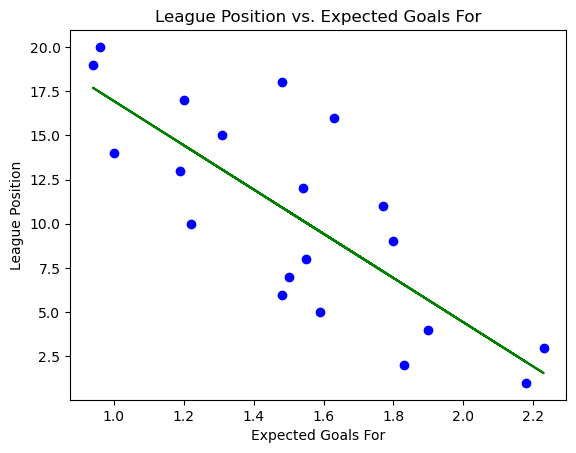

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the desired columns from the DataFrame
league_position = xg_test_df['league_position']
expected_goals_for = xg_test_df['xg_for_avg_overall']

# Create the scatter plot
plt.scatter(expected_goals_for, league_position, color='blue')

# Perform linear regression
slope, intercept = np.polyfit(expected_goals_for, league_position, 1)

# Add the trend line
plt.plot(expected_goals_for, slope * expected_goals_for + intercept, color='green')

# Add labels and title
plt.xlabel('Expected Goals For')
plt.ylabel('League Position')
plt.title('League Position vs. Average Expected Goals For')

# Display the plot
plt.show()

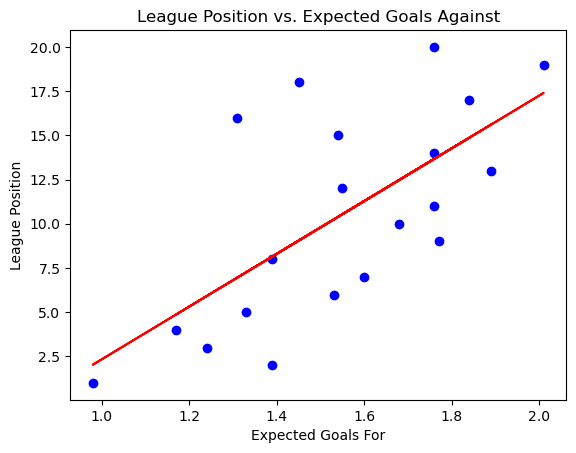

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the desired columns from the DataFrame
league_position = xg_test_df['league_position']
expected_goals_for = xg_test_df['xg_against_avg_overall']

# Create the scatter plot
plt.scatter(expected_goals_for, league_position, color='blue')

# Perform linear regression
slope, intercept = np.polyfit(expected_goals_for, league_position, 1)

# Add the trend line
plt.plot(expected_goals_for, slope * expected_goals_for + intercept, color='red')

# Add labels and title
plt.xlabel('Expected Goals For')
plt.ylabel('League Position')
plt.title('League Position vs. Average Expected Goals Against')

# Display the plot
plt.show()

Machine learning models that have information on how many goals were actually scored, without considering the information on how many goals could have been scored (Expected Goals - xG), may perform poorly compared to models that incorporate xG for several reasons:

    Incomplete Information: Knowing the number of goals actually scored provides limited information about the quality of scoring opportunities. It doesn't account for missed chances or the difficulty of the opportunities created. By considering xG, which quantifies the quality of scoring chances, models gain a more comprehensive understanding of a team's performance.

    Accounting for Variance: Goals scored can be influenced by various factors, including randomness, exceptional performances from goalkeepers, or last-ditch defending. By incorporating xG, which estimates the likelihood of scoring based on the quality of opportunities, models can account for these factors and provide a more robust evaluation of team performance.

    Better Predictive Power: Models that incorporate xG have demonstrated improved predictive power. By considering the quality of scoring opportunities, these models capture underlying patterns and trends that contribute to goal-scoring performance more accurately, leading to more reliable predictions.

    Fair Comparison: Models that incorporate xG allow for fairer comparisons between teams or players, as they consider the quality of opportunities created or faced. This enables a more accurate assessment of performance, regardless of external factors such as the strength of opponents or luck.

Since both models predict 2 different variables, I will use both to predict the same season of 2021/22, and then average the league positions they assign to each team.

First some data preparation, similar steps to earlier datasets.

# Averaging the positions predicted by both models

In [39]:
final_df = pd.read_csv("teams_dataset2122.csv")

final_X = final_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)
final_league_position_target = final_df['league_position']
final_points_per_game_target = final_df['points_per_game']

In [40]:
final_X

,matches_played,matches_played_home,matches_played_away,suspended_matches,goals_scored,goals_conceded,goal_difference,total_goal_count,total_goal_count_home,total_goal_count_away,...,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,over145_corners_percentage
0,38,19,19,0,61,48,13,109,52,57,...,2,5,4,5,7,6,4,8,7,11
1,38,19,19,0,69,40,29,109,57,52,...,2,3,4,7,3,2,3,6,10,11
2,38,19,19,0,99,26,73,125,73,52,...,3,2,3,2,3,5,2,2,4,16
3,38,19,19,0,62,59,3,121,57,64,...,7,7,9,6,2,5,7,5,11,13
4,38,19,19,0,50,46,4,96,44,52,...,4,3,4,11,5,2,4,4,9,8
5,38,19,19,0,43,66,-23,109,52,57,...,3,8,6,7,8,9,8,8,9,8
6,38,19,19,0,34,53,-19,87,43,44,...,7,5,3,8,7,5,5,5,8,18
7,38,19,19,0,43,67,-24,110,47,63,...,7,7,8,6,9,10,7,4,9,13
8,38,19,19,0,57,57,0,114,54,60,...,6,3,6,6,9,8,6,3,10,8
9,38,19,19,0,94,26,68,120,58,62,...,5,2,2,2,4,3,4,2,2,8


In [41]:
final_sr_pred = second_xg_regressor.predict(final_X)

print(final_sr_pred)

print (final_df["points_per_game"])
# Evaluate the model
sr_score = second_xg_regressor.score(final_X,final_df["points_per_game"])
print(" Regressor score: {:.2f}".format(sr_score))

#rf_model.fit(xg_X, xg_league_position_target)

[1.61 1.82 2.61 1.63 1.32 1.13 0.89 1.13 1.5  2.47 2.   1.58 0.89 1.16
 1.37 0.61 1.11 1.26 1.11 1.  ]
0     1.82
1     1.87
2     2.45
3     1.37
4     1.26
5     1.03
6     0.92
7     1.05
8     1.53
9     2.42
10    1.95
11    1.47
12    0.61
13    1.29
14    1.18
15    0.58
16    1.34
17    1.21
18    1.00
19    1.34
Name: points_per_game, dtype: float64
 Regressor score: 0.90


This is a promising regressor score of 0.90. Let us study the rankings these predictions suggest.

In [42]:
arr = np.array([ 1.61, 1.82, 2.61, 1.63, 1.32, 1.13, 0.89, 1.13, 1.5,  2.47, 2., 1.58, 0.89, 1.16,
 1.37, 0.61, 1.11, 1.26, 1.11, 1. ])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices[::-1])

arr2 = np.array(final_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:   ", sorted_indices2[::-1])

Standings predicted: [ 2  9 10  1  3  0 11  8 14  4 17 13  7  5 18 16 19 12  6 15]
Actual Standings:    [ 2  9 10  1  0  8 11  3 16 19 13  4 17 14  7  5 18  6 12 15]


A good result, especially at the top of the league: Accurately predicts the correct top 4, and in their exact positions

- Predicts a total of 6 teams in their correct positions for the 2021/22 season.
- Predicts 8 more teams within 2 positions of their actual final position.
- Only 1 team, '19' is misqualified in the wrong half and far from each other.

Now, we look at our rf-model: the generalist.

In [43]:
final_rf_pred = rf_model.predict(final_X)

print(final_rf_pred)

print (final_df["league_position"])
# Evaluate the model
rf_mse = mean_squared_error(final_df["league_position"], final_rf_pred)
rf_score = rf_model.score(final_X,final_df["league_position"])
print(" Regressor score: {:.2f}".format(rf_score))
print("  MSE: {:.2f}".format(rf_mse))

[ 5.6966  4.4846  1.7515  7.6227  7.8789 15.2399 14.7947 16.1097  8.0642
  1.8211  2.6058  7.8111 17.9791 13.5538  9.8884 18.654   9.0926 10.4672
 17.3979 10.5303]
0      5
1      4
2      1
3      8
4     12
5     16
6     18
7     15
8      6
9      2
10     3
11     7
12    19
13    11
14    14
15    20
16     9
17    13
18    17
19    10
Name: league_position, dtype: int64
 Regressor score: 0.90
  MSE: 3.44


In [44]:
arr = np.array([ 5.6966,  4.4846,  1.7515,  7.6227,  7.8789, 15.2399, 14.7947, 16.1097,  8.0642,
  1.8211,  2.6058, 7.8111, 17.9791, 13.5538,  9.8884, 18.654,  9.0926, 10.4672,
 17.3979, 10.5303])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices)

arr2 = np.array(final_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:   ", sorted_indices2[::-1])

Standings predicted: [ 2  9 10  1  0  3 11  4  8 16 14 17 19 13  6  5  7 18 12 15]
Actual Standings:    [ 2  9 10  1  0  8 11  3 16 19 13  4 17 14  7  5 18  6 12 15]


- This model accurately predicts the actual top 5 correctly.
- In total, it predicts 8 teams in their actual positions.
- 5 more teams within +-1 position of their actual positions

### Combining the results from the models.

In [45]:
sr_arr =  np.array( [ 2,  9, 10,  1,  3,  0, 11,  8, 14,  4, 17, 13,  7,  5, 18, 16, 19, 12,  6, 15])
rf_arr =  np.array( [ 2,  9, 10,  1,  0,  3, 11,  4,  8, 16, 14, 17, 19, 13,  6,  5,  7, 18, 12, 15])

average_indices = {}

for element in sr_arr:
    sr_index = np.where(sr_arr == element)[0][0]
    rf_index = np.where(rf_arr == element)[0][0]
    average_index = (sr_index + rf_index) / 2
    average_indices[element] = average_index

print("Element : Average Index")
for element, average_index in average_indices.items():
    print(f"{element} : {average_index}")
    

Element : Average Index
2 : 0.0
9 : 1.0
10 : 2.0
1 : 3.0
3 : 4.5
0 : 4.5
11 : 6.0
8 : 7.5
14 : 9.0
4 : 8.0
17 : 10.5
13 : 12.0
7 : 14.0
5 : 14.0
18 : 15.5
16 : 12.0
19 : 14.0
12 : 17.5
6 : 16.0
15 : 19.0


In [46]:
sorted_list = sorted(average_indices.keys(), key=average_indices.get)
print("Predicted league standing: ", sorted_list)

actual = np.array(final_df["points_per_game"])

actual_indices = np.arange(len(actual))

actual_indices = np.argsort(actual)

print("Actual Standings:          ",np.ndarray.tolist(actual_indices[::-1]))


Predicted league standing:  [2, 9, 10, 1, 3, 0, 11, 8, 4, 14, 17, 13, 16, 7, 5, 19, 18, 6, 12, 15]
Actual Standings:           [2, 9, 10, 1, 0, 8, 11, 3, 16, 19, 13, 4, 17, 14, 7, 5, 18, 6, 12, 15]


In [47]:
average_indices = {}

for element in sr_arr:
    sr_index = np.where(sr_arr == element)[0][0]
    rf_index = np.where(rf_arr == element)[0][0]
    average_index = (sr_index + rf_index) / 2
    if average_index in average_indices:
        average_indices[average_index].append(element)
    else:
        average_indices[average_index] = [element]

print("Element : Average Index")
for average_index, elements in average_indices.items():
    print(f"{elements} : {average_index}")

Element : Average Index
[2] : 0.0
[9] : 1.0
[10] : 2.0
[1] : 3.0
[3, 0] : 4.5
[11] : 6.0
[8] : 7.5
[14] : 9.0
[4] : 8.0
[17] : 10.5
[13, 16] : 12.0
[7, 5, 19] : 14.0
[18] : 15.5
[12] : 17.5
[6] : 16.0
[15] : 19.0


Some teams are predicted to have the same average position

Since some average positions are equal, to really see how close we are at performance measurement: 

Our predicted league ranking can be rewritten as: 

                                                    [2, 9, 10, 1, 0, 3, 11, 8, 4, 14, 17, 16, 13, 19, 7, 5, 18, 6, 12, 15]
Our actual league ranking is:                       
                          
                                                    [2, 9, 10, 1, 0, 8, 11, 3, 16, 19, 13, 4, 17, 14, 7, 5, 18, 6, 12, 15]

#  Final Results:
- #### We have predicted the top 5 acurately, and in their final positions.
- #### Our model has also predicted the bottom 6 accurately, and in ther final positions.
- #### In total, we have predicted exactly the positions of 12 teams out of 20.
- #### 4 teams within 2 positions of their predicted positions
- #### Two teams are in the wrong halves of the table (teams 19 and 14)

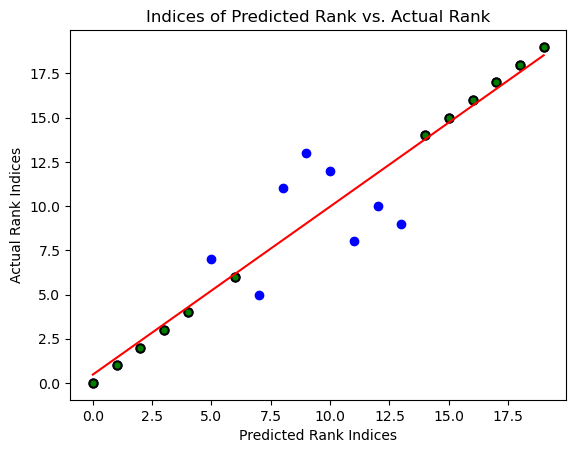

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted and actual rankings
predicted_rank = [2, 9, 10, 1, 0, 3, 11, 8, 4, 14, 17, 16, 13, 19, 7, 5, 18, 6, 12, 15]
actual_rank = [2, 9, 10, 1, 0, 8, 11, 3, 16, 19, 13, 4, 17, 14, 7, 5, 18, 6, 12, 15]

# Get indices for predicted and actual rankings
predicted_indices = list(range(len(predicted_rank)))
actual_indices = [actual_rank.index(predicted_rank[i]) for i in predicted_indices]

# Create the scatter plot
plt.scatter(predicted_indices, actual_indices, color='blue')

# Add a trend line (linear regression)
slope, intercept = np.polyfit(predicted_indices, actual_indices, 1)
plt.plot(predicted_indices, np.array(predicted_indices) * slope + intercept, color='red', label='Trend Line')

# Highlight matching ranks with green dots
for i in range(len(predicted_indices)):
    if predicted_indices[i] == actual_indices[i]:
        plt.scatter(predicted_indices[i], actual_indices[i], color='green', edgecolors='black', linewidths=1.5, label='Matching Rank')

# Add labels and title
plt.xlabel('Predicted Rank Indices')
plt.ylabel('Actual Rank Indices')
plt.title('Indices of Predicted Rank vs. Actual Rank')

# Display the plot
#plt.legend()
plt.show()


The green dots indicate a match between the predicted and actual league position

# Conclusions, Limitations, and Recommendations

### 1. CONCLUSIONS and IMPLICATIONS:
- We have developed an approach and combined the results of two machine learning models capable of predicting the most important positions in a league table- the top 6 and the bottom 6- all by looking only at statistics generated durring games.
- There is clearly a good way to play (or underlying numbers you need to generate) to secure your position in the places for European competition Qualification (UEFA Champions League and Europa League).
- Similarly, there is a bad way to play (or a combination of underlying numbers to avoid) that will leave your team struggling in relegation places.

### 2. LIMITATIONS
- This approach in particular fails to at least predict the final position of two teams, team 14 and team 19.
- Team 14, Aston Villa is predicted to be 10th but was 14th and team 19, Wolverhampton Wanderers, is predicted to be 14th but was 10th.
- It is worth to note that there is only a 7 point difference between them, the 10th and 14th. For reference, there is a 24 point difference between the 1st and 5th, and a 17 point difference between the 16th and the 20th.
- So clearly, our approach is strongest for predicting both ends of the table. The task gets progressively harder as you move towards the middle where team profile and performance tends to be more or less the same. We saw that in the middle of the table some teams are predicted to have the same position.
- It is not yet clear why a symbolic regression model is capable of predicting well points per game, but erring severely when predicting league positions.
- The same could be said for random forest models being more suited for league position prediction than points per game.
- This approach is limited in place (English Premier League) and scope (2016 - present)

### 3. SUGGESTIONS FOR FUTURE WORK.
- There is need for further investigation now to determine the  importance of these in-game metrics relative to each other and how they contribute to performance in the English premier league.
- There is need to generate similar models for other leagues, and improve on this one as well. Football is a  local phenomenon, both in time and place. So, I predict this approach will only be good at predicting performance in the English Premier League during this tactics era, where positional play, high possession, and a high pressing are trending.

# APPENDIX:
### Using the developed method to predict the current standing of  an incomplete (2022/23) season (357/380 games)
(Because why not?) - It will tell us if the model can accept smaller datasets and predict a pattern to later be observed in a larger dataset.

NOTE: Unlike a finished season, in an unfinished points per game do not absolutely determine ranking as some teams hae played fewer or more games than others.

In [49]:
appendix_df = pd.read_csv('teams_dataset2223.csv')
appendix_X = appendix_df.drop(['league_position','league_position_home','league_position_away','performance_rank','team_name','common_name','season','country','wins', 'wins_home','wins_away', 'draws', 'draws_home', 'draws_away','losses', 'losses_home', 'losses_away','points_per_game', 'points_per_game_home', 'points_per_game_away','points_per_game_half_time', 'points_per_game_half_time_home','points_per_game_half_time_away','win_percentage','win_percentage_home', 'win_percentage_away','draw_percentage_overall','draw_percentage_home','draw_percentage_away', 'loss_percentage_ovearll', 'loss_percentage_home', 'loss_percentage_away'], axis=1)

In [50]:
appendix_league_position_target = appendix_df['league_position']
appendix_points_per_game_target = appendix_df['points_per_game']

In [51]:
appendix_sr_pred = second_xg_regressor.predict(appendix_X)

print(appendix_sr_pred)

print (appendix_df["points_per_game"])
# Evaluate the model
app_score = second_xg_regressor.score(appendix_X,appendix_df["points_per_game"])
print(" Regressor score: {:.2f}".format(app_score))

[2.31 1.81 2.63 1.36 1.03 0.89 0.86 1.03 1.46 1.94 1.03 1.06 1.8  1.33
 1.44 1.94 1.   1.5  1.28 0.83]
0     2.25
1     1.58
2     2.43
3     0.83
4     1.19
5     0.89
6     0.67
7     1.08
8     1.89
9     1.81
10    1.23
11    1.03
12    1.89
13    1.58
14    1.42
15    1.71
16    0.94
17    1.47
18    0.86
19    1.11
Name: points_per_game, dtype: float64
 Regressor score: 0.77


In [52]:
arr = np.array([2.31, 1.81, 2.63, 1.36, 1.03, 0.89, 0.86, 1.03, 1.46, 1.94, 1.03, 1.06, 1.8,  1.33,
 1.44, 1.94, 1. ,  1.5,  1.28, 0.83])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices[::-1])

arr2 = np.array(appendix_df["points_per_game"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Standings(by PPG):  ", sorted_indices2[::-1])

Standings predicted: [ 2  0 15  9  1 12 17  8 14  3 13 18 11 10  7  4 16  5  6 19]
Standings(by PPG):   [ 2  0 12  8  9 15 13  1 17 14 10  4 19  7 11 16  5 18  3  6]


In [53]:
appendix_rf_pred = rf_model.predict(appendix_X)

print(appendix_rf_pred)

print (appendix_df["league_position"])
# Evaluate the model
app_rf_mse = mean_squared_error(appendix_df["league_position"], appendix_rf_pred)
app_rf_score = rf_model.score(appendix_X,appendix_df["league_position"])
print(" Regressor score: {:.2f}".format(app_rf_score))
print("  MSE: {:.2f}".format(app_rf_mse))

[ 3.5089  7.0224  1.6479 13.9025 11.0325 17.5021 18.123  17.5043  6.5118
  4.3958  9.3233 13.416   4.365   7.7605  8.6999  4.9788 17.0779  7.6511
 16.4425 14.2627]
0      2
1      7
2      1
3     19
4     12
5     17
6     20
7     14
8      4
9      5
10    11
11    15
12     3
13     8
14    10
15     6
16    16
17     9
18    18
19    13
Name: league_position, dtype: int64
 Regressor score: 0.90
  MSE: 3.47


In [54]:
arr = np.array([3.5089,  7.0224,  1.6479, 13.9025, 11.0325, 17.5021, 18.123,  17.5043,  6.5118,
  4.3958,  9.3233, 13.416,   4.365,   7.7605,  8.6999,  4.9788, 17.0779,  7.6511,
 16.4425, 14.2627])

# Assign indices to the array
indices = np.arange(len(arr))

# Sort the array and get the sorted indices
sorted_indices = np.argsort(arr)

# Print the sorted indices, from highest to lowest
print("Standings predicted:", sorted_indices[::1])

arr2 = np.array(appendix_df["league_position"])

indices2 = np.arange(len(arr2))

sorted_indices2 = np.argsort(arr2)

print("Actual Standings:   ", sorted_indices2[::1])

Standings predicted: [ 2  0 12  9 15  8  1 17 13 14 10  4 11  3 19 18 16  5  7  6]
Actual Standings:    [ 2  0 12  8  9 15  1 13 17 14 10  4 19  7 11 16  5 18  3  6]


### You can see that both our base models reasonably predict the current standing of the season, but in this case our regression model that predicts league position is much more accurate and there is no need to combine its results with the symbolic regressor.